In [0]:
# get text data from url
import urllib.request
stringInURL = "https://www.gutenberg.org/files/65106/65106-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/raju.txt")

Out[1]: ('/tmp/raju.txt', <http.client.HTTPMessage at 0x7f5dcf93ddc0>)

In [0]:
dbutils.fs.mv("file:/tmp/raju.txt", "dbfs:/data/raju.txt")

Out[2]: True

In [0]:
raju_RDD = sc.textFile("dbfs:/data/raju.txt")

In [0]:
# flatmap each line to words
wordsRDD = raju_RDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
import re
# remove punctutation
clean_tokens_RDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))

In [0]:
#prepare to clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopwords = remove.getStopWords()
clean_words_RDD=clean_tokens_RDD.filter(lambda wrds: wrds not in stopwords)

In [0]:
#maps the words to key value pairs
IKVPairsRDD= clean_words_RDD.map(lambda word: (word,1))

In [0]:
# reduceByKey() to get (word,count) results
raju_word_count_RDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
raju_results = raju_word_count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(25)
print(raju_results)

[(9839, ''), (623, 'ice'), (492, 'one'), (448, 'captain'), (393, 'two'), (379, 'men'), (367, 'made'), (346, 'party'), (330, 'upon'), (312, 'land'), (309, 'north'), (307, 'ship'), (303, 'found'), (301, 'expedition'), (301, 'cape'), (276, 'th'), (275, 'us'), (269, 'island'), (268, 'days'), (264, 'journey'), (247, 'bay'), (243, 'reached'), (242, 'lieutenant'), (232, 'dr'), (230, 'miles')]

In [0]:
results = raju_word_count_RDD.collect()
print(results)

[('project', 90), ('gutenberg', 31), ('ebook', 13), ('helen', 6), ('wright', 3), ('', 9839), ('use', 46), ('anyone', 5), ('anywhere', 7), ('united', 69), ('world', 38), ('restrictions', 2), ('whatsoever', 2), ('may', 191), ('give', 30), ('away', 93), ('reuse', 2), ('online', 5), ('check', 6), ('country', 35), ('using', 7), ('title', 2), ('story', 25), ('earliest', 2), ('pole', 108), ('april', 78), ('language', 7), ('set', 100), ('encoding', 1), ('utf', 1), ('produced', 14), ('becker', 2), ('team', 7), ('generously', 3), ('internet', 1), ('archive', 14), ('start', 26), ('macmillan', 11), ('new', 104), ('york', 57), ('co', 17), ('limited', 12), ('calcutta', 1), ('canada', 5), ('commander', 68), ('robert', 18), ('peary', 83), ('usn', 6), ('reached', 243), ('copyright', 29), ('clinedinst', 5), ('dc', 3), ('published', 7), ('october', 62), ('norwood', 2), ('j', 28), ('cushing', 1), ('smith', 23), ('usa', 9), ('preface', 1), ('material', 10), ('book', 15), ('gathered', 14), ('arctic', 202), ('chief', 29), ('labour', 12), ('rather', 25), ('field', 37), ('bounds', 3), ('single', 22), ('bring', 16), ('readers', 4), ('mind', 34), ('accurate', 3), ('record', 69), ('deeds', 3), ('go', 56), ('make', 118), ('far', 111), ('let', 25), ('tell', 15), ('simple', 6), ('reads', 1), ('temperament', 1), ('gathers', 2), ('perhaps', 17), ('appreciates', 1), ('luxuries', 2), ('civilized', 6), ('unknown', 29), ('fight', 9), ('relentless', 2), ('greatest', 13), ('foes', 1), ('starvation', 16), ('though', 76), ('fall', 28), ('victim', 4), ('cause', 12), ('home', 83), ('knees', 6), ('wilderness', 7), ('dyingthe', 1), ('work', 138), ('fundamental', 1), ('stand', 21), ('centuries', 13), ('weary', 14), ('traveller', 2), ('pilgrimage', 2), ('pathway', 2), ('stirs', 1), ('layman', 1), ('perplexities', 2), ('common', 11), ('grateful', 3), ('gentlemen', 4), ('allen', 7), ('young', 49), ('following', 131), ('others', 65), ('furnishing', 1), ('selected', 22), ('matter', 17), ('kind', 22), ('assistance', 43), ('possible', 71), ('hartford', 1), ('selections', 11), ('lost', 58), ('d', 42), ('appleton', 2), ('lanmans', 1), ('farthest', 43), ('payers', 6), ('circle', 23), ('greelys', 16), ('northwest', 61), ('reproduce', 6), ('portraits', 3), ('admirals', 2), ('schley', 10), ('melville', 93), ('constable', 2), ('p', 14), ('portrait', 8), ('amundsen', 16), ('page', 11), ('pearys', 20), ('fiala', 10), ('fighting', 6), ('ice', 623), ('encyclopdia', 1), ('britannica', 1), ('scott', 2), ('keltie', 1), ('esq', 9), ('editor', 4), ('geographical', 33), ('houghton', 1), ('mifflin', 1), ('voyage', 135), ('jeannette', 34), ('melvilles', 4), ('lena', 16), ('dodd', 1), ('mead', 1), ('abruzzis', 1), ('b', 16), ('photographs', 5), ('mr', 137), ('illustrated', 15), ('news', 48), ('nares', 23), ('agency', 1), ('maps', 8), ('voyages', 27), ('longmans', 1), ('green', 12), ('nansens', 7), ('crossing', 26), ('mcclures', 2), ('baldwinziegler', 5), ('h', 45), ('long', 213), ('lockwood', 26), ('c', 29), ('paul', 3), ('sea', 174), ('g', 26), ('monthly', 1), ('sampson', 1), ('low', 30), ('marston', 1), ('german', 25), ('expeditions', 25), ('scribners', 1), ('schwatkas', 7), ('search', 103), ('three', 228), ('years', 104), ('service', 30), ('schleys', 3), ('contents', 9), ('chapter', 51), ('adventurers', 3), ('pytheasdicuilotherwulfstanthe', 2), ('bardsenthe', 2), ('corterealswilloughby', 2), ('chancellorstephen', 2), ('humphrey', 18), ('seventeenth', 3), ('hudsonbaffindeshneffbehringschalarofftchitschagofanjou', 2), ('wrangellphipps', 2), ('iii', 3), ('nineteenth', 5), ('parry', 59), ('davis', 17), ('bays', 13), ('channels', 7), ('natives', 82), ('near', 121), ('baythe', 2), ('lancaster', 25), ('soundadvance', 2), ('barred', 5), ('crocker', 8), ('mountainsreturn', 2), ('franklin', 193), ('via', 10), ('june', 99), ('high', 79), ('latitude', 94), ('ncourse', 2), ('east', 61), ('coast', 201), ('england', 87), ('iv', 5), ('parrys', 12), ('voyageobject', 2), ('survey', 17), ('sound', 98), ('mountains

Count Words
0 9839 
1 623 ice
2 492 one
3 448 captain
4 393 two
5 379 men
6 367 made
7 346 party
8 330 upon
9 312 land
10 309 north
11 307 ship
12 303 found
13 301 expedition
14 301 cape
15 276 th
16 275 us
17 269 island
18 268 days
19 264 journey
20 247 bay
21 243 reached
22 242 lieutenant
23 232 dr
24 230 miles
Out[11]:

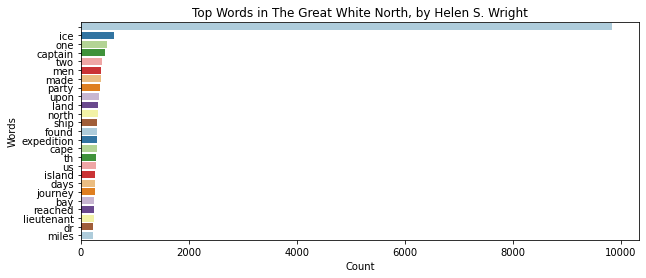

Text(0.5, 1.0, 'Top Words in The Great White North, by Helen S. Wright')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'The Great White North, by Helen S. Wright'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(raju_results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(10,4))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)
